## **TASK - 4**

## 🐦💬Twitter Sentiment Analysis 📉📈

## 📦 Importing Libraries

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
from wordcloud import WordCloud

In [5]:
import nltk

In [6]:
from textblob import TextBlob

In [7]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## 📥 Load Dataset

In [8]:
# Loading the data
df = pd.read_csv("twitter_training.csv", names=["entity", "sentiment", "tweet_id", "content"])

## 🔎 Initial Data Exploration

In [9]:
# Display the first few rows
df.head()

,entity,sentiment,tweet_id,content
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [10]:
# Display the last few rows
df.tail()

,entity,sentiment,tweet_id,content
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...


In [11]:
print("🔍 Dataset Shape:", df.shape)

🔍 Dataset Shape: (74682, 4)


In [12]:
print(df.columns)

Index(['entity', 'sentiment', 'tweet_id', 'content'], dtype='object')


## 🔍 Viewing Dataset Information

In [13]:
# View Dataset Info
print("🔎 Dataset Information:\n")
df.info()

🔎 Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   entity     74682 non-null  int64 
 1   sentiment  74682 non-null  object
 2   tweet_id   74682 non-null  object
 3   content    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [14]:
# Summary Statistics
print("\n📊 Dataset Description:\n")
print(df.describe())


📊 Dataset Description:

             entity
count  74682.000000
mean    6432.586165
std     3740.427870
min        1.000000
25%     3195.000000
50%     6422.000000
75%     9601.000000
max    13200.000000


## 🧹 Data Preprocessing

In [15]:
# Drop duplicates and nulls
df.drop_duplicates(subset="content", inplace=True)
df.dropna(subset=["content"], inplace=True)

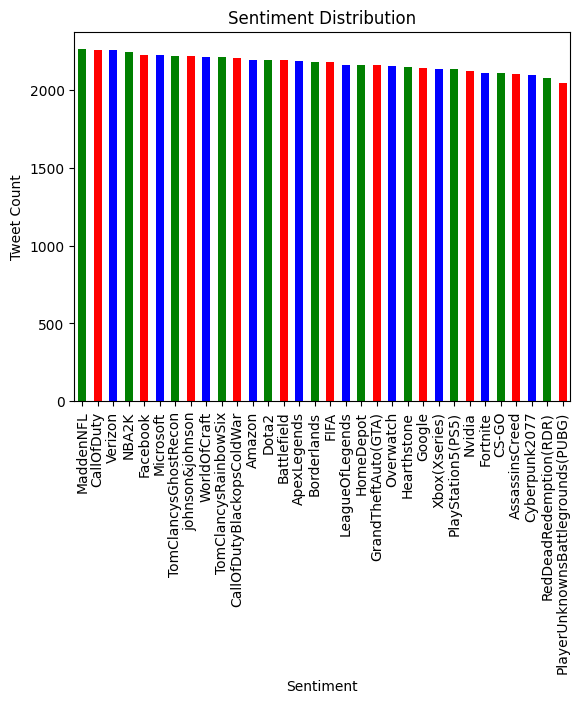

In [16]:
# Check class balance
df["sentiment"].value_counts().plot(kind="bar", title="Sentiment Distribution", color=["green", "red", "blue"])
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()

## 🧠 Sentiment Polarity Analysis (Using TextBlob)

In [17]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

In [18]:
df['polarity'] = df['content'].apply(get_polarity)

In [19]:
# Categorize into Positive, Neutral, Negative
def get_sentiment(p):
    if p > 0:
        return "positive"
    elif p < 0:
        return "negative"
    else:
        return "neutral"

df['predicted_sentiment'] = df['polarity'].apply(get_sentiment)

In [20]:
# Compare original vs predicted
pd.crosstab(df['sentiment'], df['predicted_sentiment'], normalize='index') * 100

predicted_sentiment,negative,neutral,positive
sentiment,,,
Amazon,20.383037,22.070223,57.546740
ApexLegends,30.315501,22.588020,47.096479
AssassinsCreed,20.769962,16.159696,63.070342
Battlefield,16.887266,38.612506,44.500228
Borderlands,26.422018,17.752294,55.825688
CS-GO,30.897010,17.845278,51.257712
CallOfDuty,36.963258,17.352811,45.683931
CallOfDutyBlackopsColdWar,37.829246,23.297003,38.873751
Cyberpunk2077,27.090301,22.694697,50.215002


## ☁️ WordCloud for Sentiment Terms

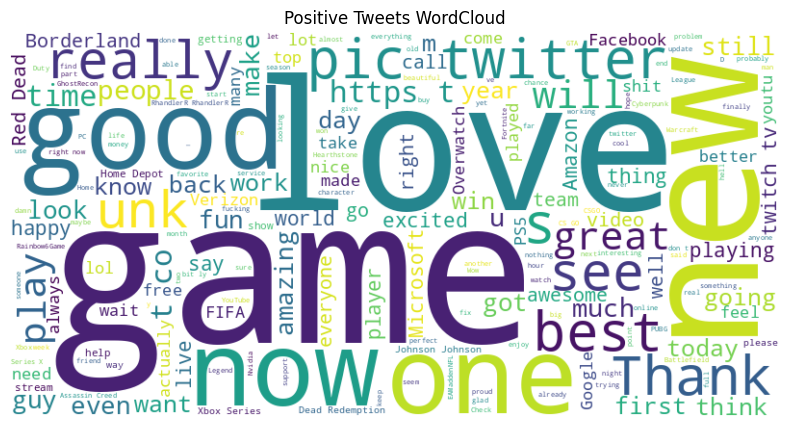

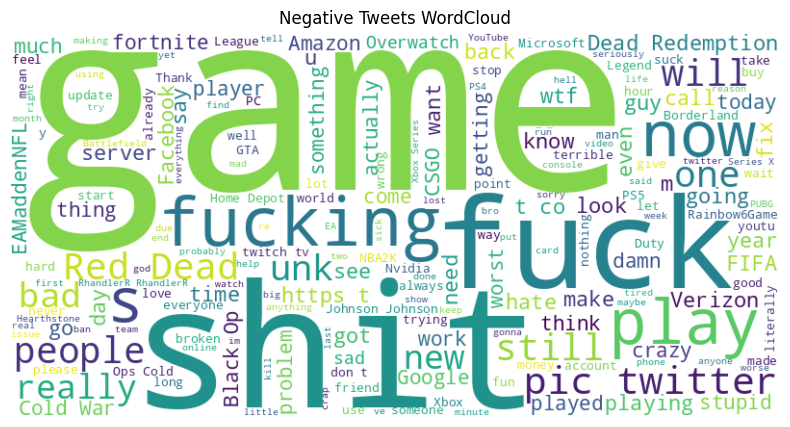

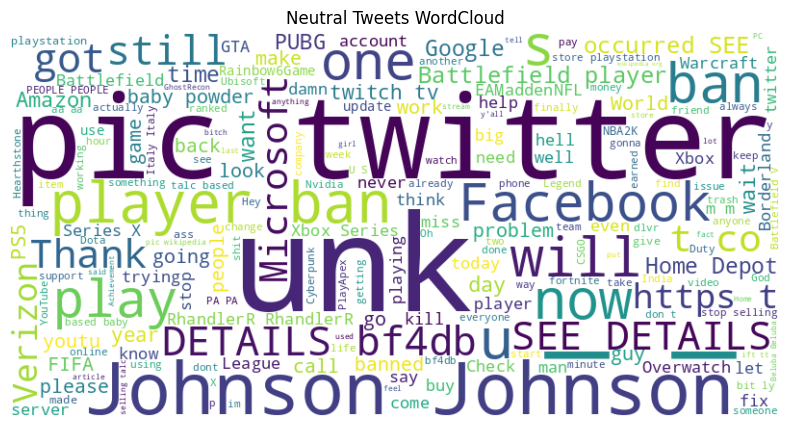

In [21]:
for sentiment in ['positive', 'negative', 'neutral']:
    text = " ".join(df[df['predicted_sentiment'] == sentiment]['content'].values)
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{sentiment.capitalize()} Tweets WordCloud")
    plt.show()

## 📊Sentiment Trend by Entity

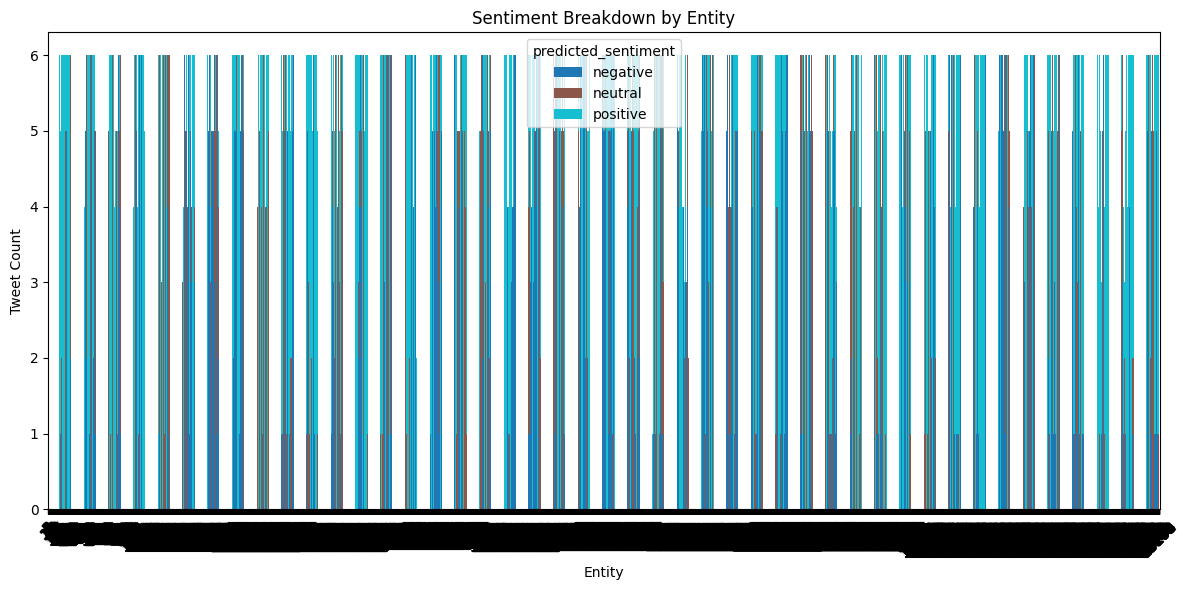

In [22]:
entity_sentiment = df.groupby(['entity', 'predicted_sentiment']).size().unstack().fillna(0)
entity_sentiment.plot(kind='bar', stacked=True, figsize=(12,6), colormap="tab10")
plt.title("Sentiment Breakdown by Entity")
plt.xlabel("Entity")
plt.ylabel("Tweet Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 📝 Conclusion and Key Insights

In [23]:
# CONCLUSION 📊📌
total_tweets = len(df)
positive = len(df[df['predicted_sentiment'] == 'positive'])
negative = len(df[df['predicted_sentiment'] == 'negative'])
neutral = len(df[df['predicted_sentiment'] == 'neutral'])

print("========== Sentiment Analysis Summary ==========")
print(f"Total Tweets Analyzed      : {total_tweets}")
print(f"Positive Sentiment Tweets  : {positive} ({positive/total_tweets*100:.2f}%)")
print(f"Negative Sentiment Tweets  : {negative} ({negative/total_tweets*100:.2f}%)")
print(f"Neutral Sentiment Tweets   : {neutral} ({neutral/total_tweets*100:.2f}%)")

top_entities = df['entity'].value_counts().head(5)
print("\nTop 5 Discussed Entities:")
print(top_entities.to_string())
print("\nSentiment analysis completed successfully. Visualizations and polarity analysis reveal clear public opinion trends across various entities.")


========== Sentiment Analysis Summary ==========
Total Tweets Analyzed      : 69491
Positive Sentiment Tweets  : 32571 (46.87%)
Negative Sentiment Tweets  : 20637 (29.70%)
Neutral Sentiment Tweets   : 16283 (23.43%)

Top 5 Discussed Entities:
entity
9200    6
2401    6
2402    6
2403    6
9199    6

Sentiment analysis completed successfully. Visualizations and polarity analysis reveal clear public opinion trends across various entities.
